In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data() #load train + tset dataset

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

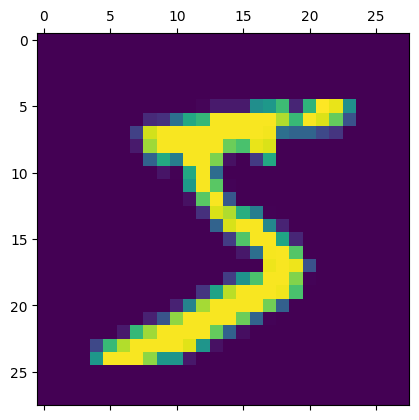

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 9.6605 - accuracy: 0.8420
Epoch 2/5
1875/1875 [==============================] - 2s 994us/step - loss: 6.1743 - accuracy: 0.8780
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.7491 - accuracy: 0.8829
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.4582 - accuracy: 0.8852
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 5.3935 - accuracy: 0.8868


In [13]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 877us/step - loss: 7.5820 - accuracy: 0.8578


[7.582003116607666, 0.8578000068664551]

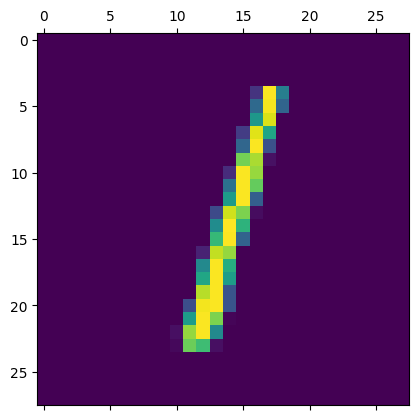

In [14]:
plt.matshow(X_test[2])

In [15]:
y_predicted = model.predict(X_test_flattened)
y_predicted[2]

313/313 [==============================] - 0s 769us/step


array([0.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.8648946e-04,
       1.7893933e-34, 2.4319136e-17, 1.0000000e+00, 2.3168079e-31,
       9.9282193e-01, 2.5998147e-12], dtype=float32)

In [16]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [17]:
y_predicted_labels[:5]

[3, 0, 1, 0, 4]

In [18]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 977,    0,    0,    0,    3,    0,    0,    0,    0,    0],
       [  13, 1120,    1,    0,    0,    1,    0,    0,    0,    0],
       [ 428,  272,  324,    4,    3,    1,    0,    0,    0,    0],
       [ 183,  157,  490,  179,    0,    0,    0,    1,    0,    0],
       [  85,   30,  198,  260,  406,    0,    2,    0,    0,    1],
       [ 133,   29,  213,  302,   74,  139,    1,    0,    1,    0],
       [ 187,   14,  712,   19,   16,    6,    4,    0,    0,    0],
       [  57,   54,  217,  586,   59,   14,    0,   40,    1,    0],
       [ 127,  197,  420,  151,   32,   44,    1,    1,    1,    0],
       [  43,   25,   84,  620,  227,    4,    0,    5,    0,    1]])>

Text(95.72222222222221, 0.5, 'Truth')

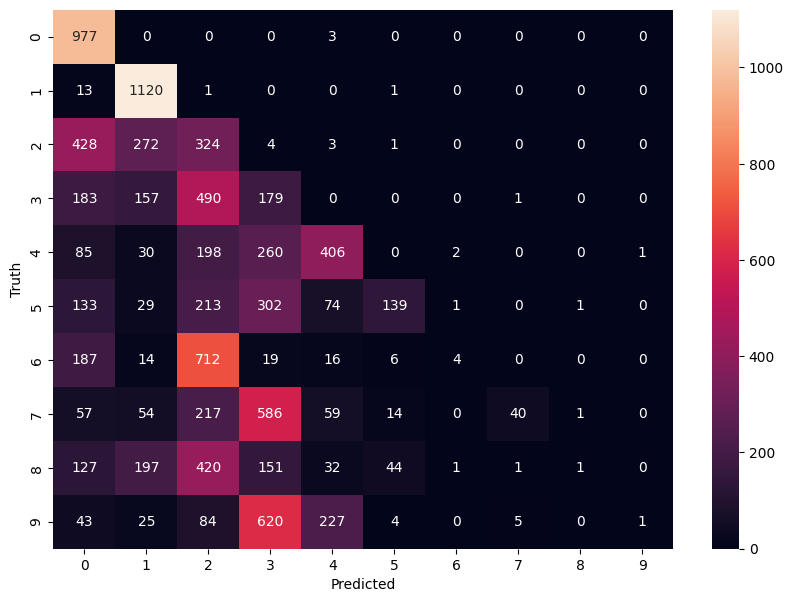

In [19]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/", histogram_freq=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5, callbacks = [tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.4664 - accuracy: 0.8394
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4138 - accuracy: 0.9000
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3021 - accuracy: 0.9233
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2613 - accuracy: 0.9331
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2392 - accuracy: 0.9384


In [31]:
%reload_ext tensorboard
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 10088), started 0:00:41 ago. (Use '!kill 10088' to kill it.)

In [23]:

model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 994us/step - loss: 0.3074 - accuracy: 0.9353


[0.30739933252334595, 0.9352999925613403]

In [22]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

ValueError: in user code:

    File "C:\Users\jlhb83\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\jlhb83\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\jlhb83\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\jlhb83\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\jlhb83\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\jlhb83\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 28, 28), found shape=(None, 784)


In [ ]:
keras.layers.Flatten(input_shape=(28, 28)),